In [1]:
import h3ppy
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from array import array
import sys
import pandas as pd

import os
#os.environ['PYSYN_CDBS']
import pysynphot as S
from astropy.io import ascii

import io
from pathlib import Path
import math
from matplotlib.colors import LogNorm as lognorm
import scipy.integrate as integrate
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp


#1st order lines:
#3.953 3.98553 3.98702 4.0119 4.013245

#4th order lines
#3.42082,3.42698,3.45474,3.4566,3.46755

C:\Users\kater00\anaconda3\lib\site-packages\pysynphot\locations.py:46: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
C:\Users\kater00\anaconda3\lib\site-packages\pysynphot\locations.py:345: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
C:\Users\kater00\anaconda3\lib\site-packages\pysynphot\refs.py:117: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for https://ssb.stsci.edu/trds\mtab\*_tmg.fits
  warnings.warn('No graph or component tables found; '
C:\Users\kater00\anaconda3\lib\site-packages\pysynphot\refs.py:124: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for https://ssb.stsci.edu/trds\mtab\*_tmt.fits
  warnings.warn('No thermal tables found, '


In [2]:
order = '1'

#flat
flatlist = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0008_flat.fits')
flat = fits.getdata(flatlist, ext=0)

#sky
skylist1 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0033_sky.fits')
sky1 = fits.getdata(skylist1, ext=0)
skylist2 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0036_sky.fits')
sky2 = fits.getdata(skylist2, ext=0)
skylist3 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0039_sky.fits')
sky3 = fits.getdata(skylist3, ext=0)
skylist4 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0042_sky.fits')
sky4 = fits.getdata(skylist4, ext=0)
skylist5 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0045_sky.fits')
sky5 = fits.getdata(skylist5, ext=0)

#stars
starBlist1 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0084_star.fits')
starB1 = fits.getdata(starBlist1, ext=0)

starAlist1 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0085_star.fits')
starA1 = fits.getdata(starAlist1, ext=0)

starBlist2 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0086_star.fits')
starB2 = fits.getdata(starBlist2, ext=0)

starAlist2 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0087_star.fits')
starA2 = fits.getdata(starAlist2, ext=0)

starBlist3 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0088_star.fits')
starB3 = fits.getdata(starBlist3, ext=0)

starAlist3 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0089_star.fits')
starA3 = fits.getdata(starAlist3, ext=0)

starBlist4 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0090_star.fits')
starB4 = fits.getdata(starBlist4, ext=0)

starAlist4 = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0091_star.fits')
starA4 = fits.getdata(starAlist4, ext=0)

#jupiter frames
jupiter1list = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0032_jupS.fits')
jupiter1 = fits.getdata(jupiter1list, ext=0)

jupiter2list = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0035_jupS.fits')
jupiter2 = fits.getdata(jupiter2list, ext=0)

jupiter3list = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0038_jupS.fits')
jupiter3 = fits.getdata(jupiter3list, ext=0)

jupiter4list = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0041_jupS.fits')
jupiter4 = fits.getdata(jupiter4list, ext=0)

jupiter5list = get_pkg_data_filename('X:/obs_22/Keck_17Aug/spec/e1o' +order+'/nspec220817_0044_jupS.fits')
jupiter5 = fits.getdata(jupiter5list, ext=0)

In [3]:
wave_e1o1 = pd.read_csv(r'X:\obs_22\Keck_17Aug\spec\e1o1\star e1o1.dat',delim_whitespace=True,skiprows=2)
star_e1o1 = np.load(r'X:\obs_22\Keck_17Aug\spec\e1o1\star_e1o1.npy')
jup1_e1o1 = np.load(r'X:\obs_22\Keck_17Aug\spec\e1o1\jup1_e1o1.npy')
jup2_e1o1 = np.load(r'X:\obs_22\Keck_17Aug\spec\e1o1\jup2_e1o1.npy')
jup3_e1o1 = np.load(r'X:\obs_22\Keck_17Aug\spec\e1o1\jup3_e1o1.npy')
jup4_e1o1 = np.load(r'X:\obs_22\Keck_17Aug\spec\e1o1\jup4_e1o1.npy')
jup5_e1o1 = np.load(r'X:\obs_22\Keck_17Aug\spec\e1o1\jup5_e1o1.npy')

wave_e1o4 = pd.read_csv(r'X:\obs_22\Keck_17Aug\spec\e1o4\star e1o4.dat',delim_whitespace=True,skiprows=2)
star_e1o4 = np.load(r'X:\obs_22\Keck_17Aug\spec\e1o4\star_e1o4.npy')
jup1_e1o4 = np.load(r'X:\obs_22\Keck_17Aug\spec\e1o4\jup1_e1o4.npy')
jup2_e1o4 = np.load(r'X:\obs_22\Keck_17Aug\spec\e1o4\jup2_e1o4.npy')
jup3_e1o4 = np.load(r'X:\obs_22\Keck_17Aug\spec\e1o4\jup3_e1o4.npy')
jup4_e1o4 = np.load(r'X:\obs_22\Keck_17Aug\spec\e1o4\jup4_e1o4.npy')
jup5_e1o4 = np.load(r'X:\obs_22\Keck_17Aug\spec\e1o4\jup5_e1o4.npy')

In [4]:
wave_micron1st = wave_e1o1["lambda"]
wave_ang1st = wave_e1o1["lambda"]*10000

wave_micron4th = wave_e1o4["lambda"]
wave_ang4th = wave_e1o4["lambda"]*10000

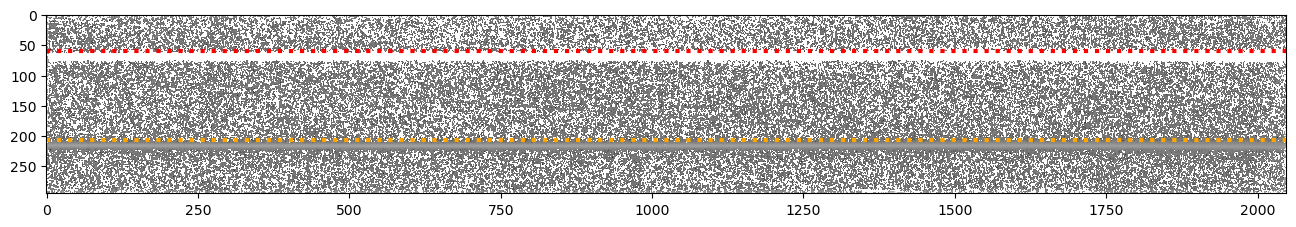

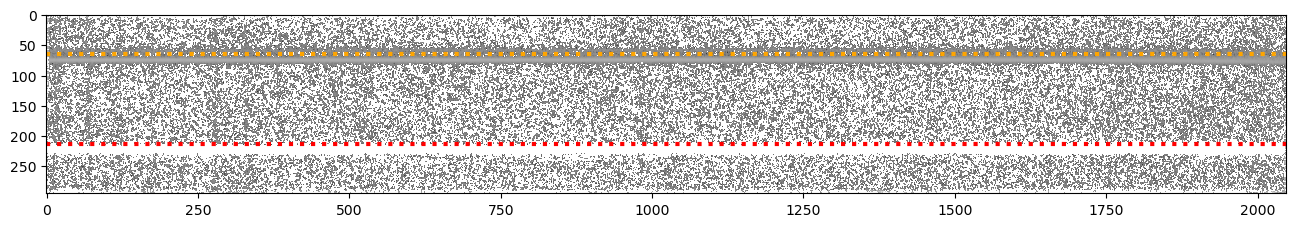

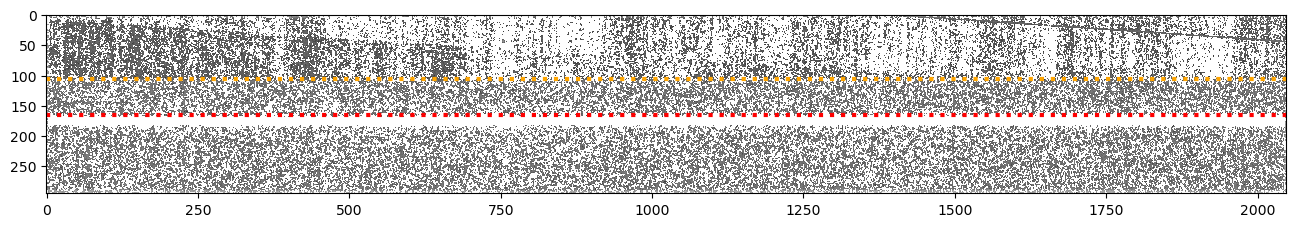

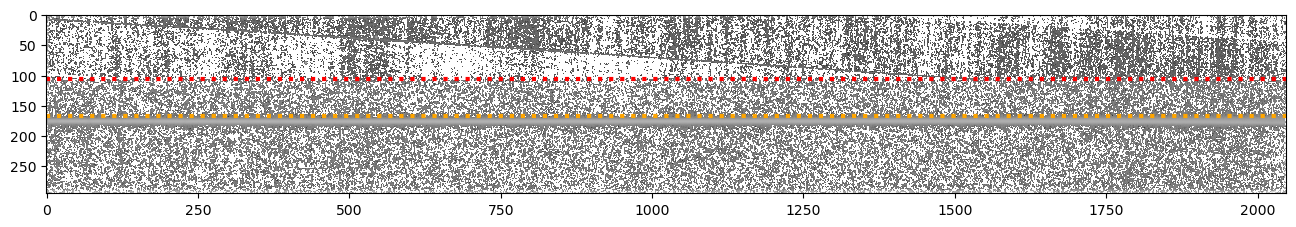

In [5]:
plt.figure(figsize=(16, 12))
plt.imshow(starA1/flat-starB1/flat, cmap='gray', norm = lognorm())
plt.axhline(y = np.sum(starA1[10:-10], axis = 1).argmax(), linestyle = ':',color = 'orange', linewidth = 3)
plt.axhline(y = np.sum(starB1[10:-10], axis = 1).argmax(), linestyle = ':',color = 'r', linewidth = 3)
plt.show()

plt.figure(figsize=(16, 12))
plt.imshow(starA2/flat-starB2/flat, cmap='gray', norm = lognorm())
plt.axhline(y = np.sum(starA2[10:-10], axis = 1).argmax(), linestyle = ':',color = 'orange', linewidth = 3)
plt.axhline(y = np.sum(starB2[10:-10], axis = 1).argmax(), linestyle = ':',color = 'r', linewidth = 3)
plt.show()

plt.figure(figsize=(16, 24))
plt.imshow(starA3/flat-starB3/flat, cmap='gray', norm = lognorm())
plt.axhline(y = np.sum(starA3[10:-10], axis = 1).argmax(), linestyle = ':',color = 'orange', linewidth = 3)
plt.axhline(y = np.sum(starB3[10:-10], axis = 1).argmax(), linestyle = ':',color = 'r', linewidth = 3)
plt.show()

plt.figure(figsize=(16, 16))
plt.imshow(starA4/flat-starB4/flat, cmap='gray', norm = lognorm())
plt.axhline(y = np.sum(starA4[10:-10], axis = 1).argmax(), linestyle = ':',color = 'orange', linewidth = 3)
plt.axhline(y = np.sum(starB4[10:-10], axis = 1).argmax(), linestyle = ':',color = 'r', linewidth = 3)
plt.show()

#star4 = starA1/flat-starB1/flat + starA2/flat-starB2/flat + starA3/flat-starB3/flat + starA4/flat-starB4/flat

#plt.figure(figsize=(16, 12))
#plt.imshow(star4, cmap='gnuplot2', norm = lognorm())
#plt.show()

In [53]:
#test = np.sum(starA1, axis=1)
starA1peak = np.sum(starA1[10:-10], axis = 1).argmax() + 10
starB1peak = np.sum(starB1[10:-10], axis = 1).argmax() + 10

starA2peak = np.sum(starA2[10:-10], axis = 1).argmax() + 10
starB2peak = np.sum(starB2[10:-10], axis = 1).argmax() + 10

starA3peak = np.sum(starA3[10:-10], axis = 1).argmax() + 10
starB3peak = np.sum(starB3[10:-10], axis = 1).argmax() + 10

starA4peak = np.sum(starA4[10:-10], axis = 1).argmax() + 10
starB4peak = np.sum(starB4[10:-10], axis = 1).argmax() + 10

print(starA1peak)
print(starB1peak)
print(starA2peak)
print(starB2peak)
print(starA3peak)
print(starB3peak)
print(starA4peak)
print(starB4peak)

217
70
75
223
116
176
177
116


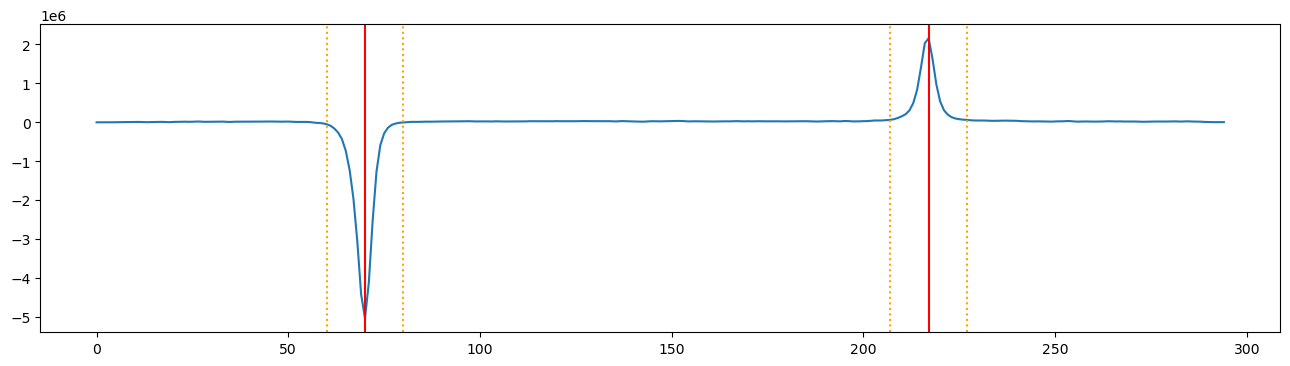

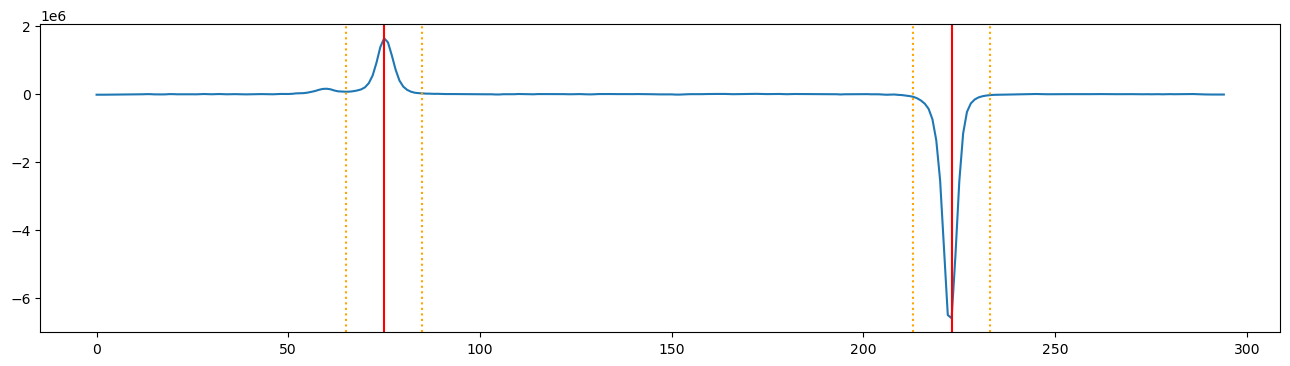

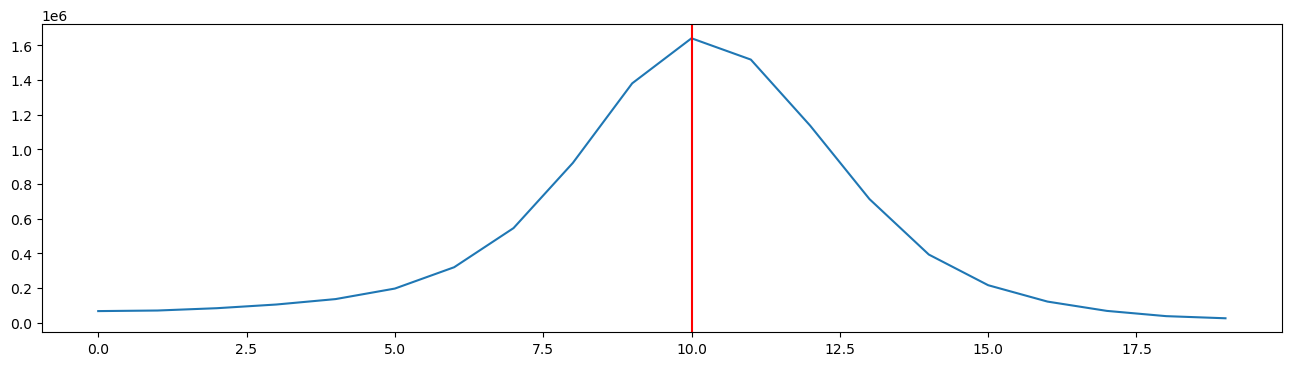

In [54]:
widthpeak = 10

starA1sum = np.sum(starA1, axis = 1)
starB1sum = np.sum(starB1, axis = 1)
starA2sum = np.sum(starA2, axis = 1)
starB2sum = np.sum(starB2, axis = 1)

AB1 = starA1sum - starB1sum
AB2 = starA2sum - starB2sum

plt.figure(figsize=(16, 4))
plt.plot(range(len(starA1sum)), AB1)
plt.axvline(x = starA1peak, color='r')
plt.axvline(x = starA1peak-widthpeak, color='orange', linestyle = ":")
plt.axvline(x = starA1peak+widthpeak, color='orange', linestyle = ":")

plt.axvline(x = starB1peak, color='r')
plt.axvline(x = starB1peak-widthpeak, color='orange', linestyle = ":")
plt.axvline(x = starB1peak+widthpeak, color='orange', linestyle = ":")
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(range(len(starA2sum)), AB2)
plt.axvline(x = starA2peak, color='r')
plt.axvline(x = starA2peak-widthpeak, color='orange', linestyle = ":")
plt.axvline(x = starA2peak+widthpeak, color='orange', linestyle = ":")

plt.axvline(x = starB2peak, color='r')
plt.axvline(x = starB2peak-widthpeak, color='orange', linestyle = ":")
plt.axvline(x = starB2peak+widthpeak, color='orange', linestyle = ":")
plt.show()


plt.figure(figsize=(16, 4))
plt.plot(range(len(AB2[starA2peak-widthpeak:starA2peak+widthpeak])),  AB2[starA2peak-widthpeak:starA2peak+widthpeak])
plt.axvline(x = int(len(AB2[starA2peak-widthpeak:starA2peak+widthpeak])/2), color='r')
plt.show()

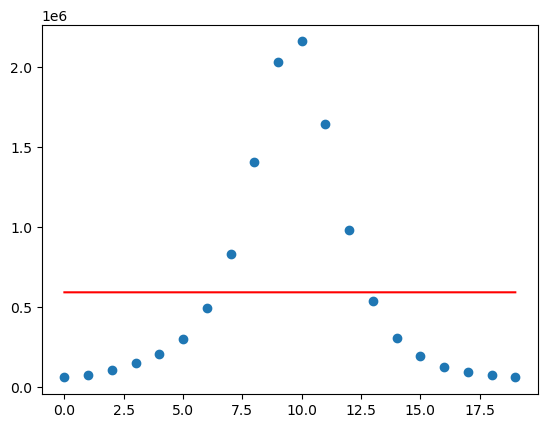

In [51]:
#attempts to fit gaussian - not going well...

x = np.array(range(len(AB1[starA2peak-widthpeak:starA2peak+widthpeak])))
y = np.array(AB1[starA1peak-widthpeak:starA1peak+widthpeak])



# Define the Gaussian function
def func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, 'o', label='Function')
  
popt, pcov = curve_fit(func, x, y)
  
ym = func(x, popt[0], popt[1], popt[2])
ax.plot(x, ym, c='r', label='Best fit')

[0.99857671 4.90666008 1.94908059]


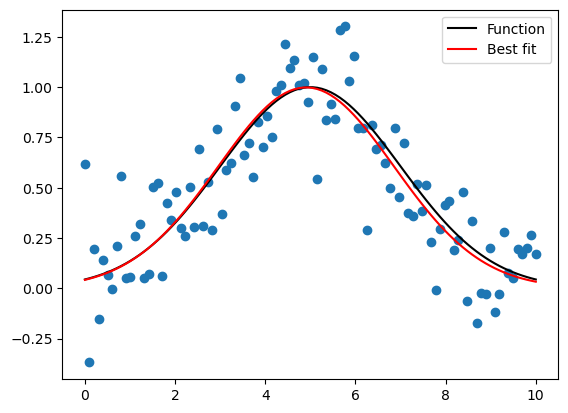

In [49]:
# Let's create a function to model and create data
def func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
  
# Generating clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2)
  
# Adding noise to the data
yn = y + 0.2 * np.random.normal(size=len(x))
  
# Plot out the current state of the data and model
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='k', label='Function')
ax.scatter(x, yn)
  
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)
  
#popt returns the best fit values for parameters of the given model (func)
print (popt)
  
ym = func(x, popt[0], popt[1], popt[2])
ax.plot(x, ym, c='r', label='Best fit')
ax.legend()
plt.show()

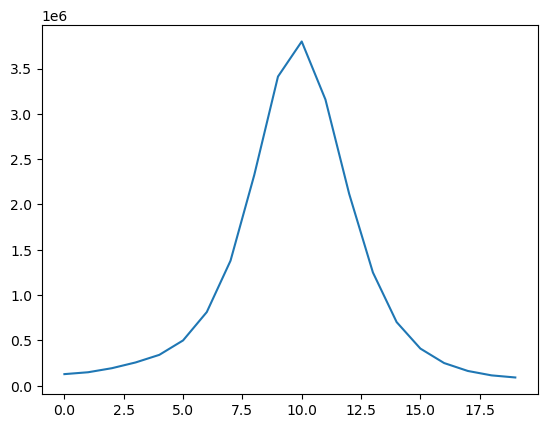

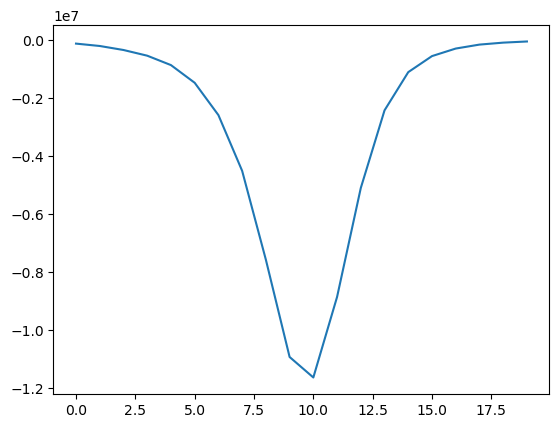

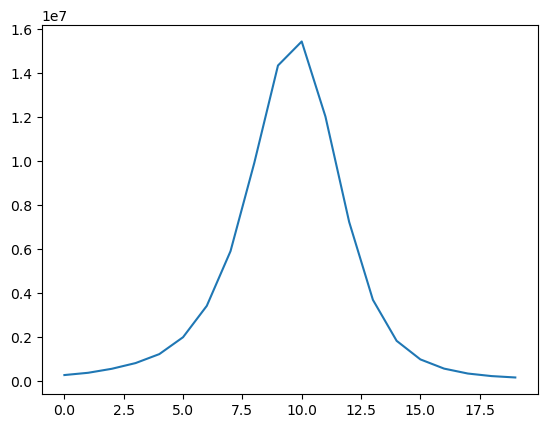

In [12]:
posStar = AB1[starA1peak-widthpeak:starA1peak+widthpeak] + AB2[starA2peak-widthpeak:starA2peak+widthpeak]
negStar = AB1[starB1peak-widthpeak:starB1peak+widthpeak] + AB2[starB2peak-widthpeak:starB2peak+widthpeak]



plt.plot(range(len(posStar)), posStar)
plt.show()

plt.plot(range(len(negStar)), negStar)
plt.show()


totalStar = posStar - negStar

plt.plot(range(len(totalStar)), totalStar)
plt.show()

In [ ]:
#area = trapz(y = starA1sum, x = 0)

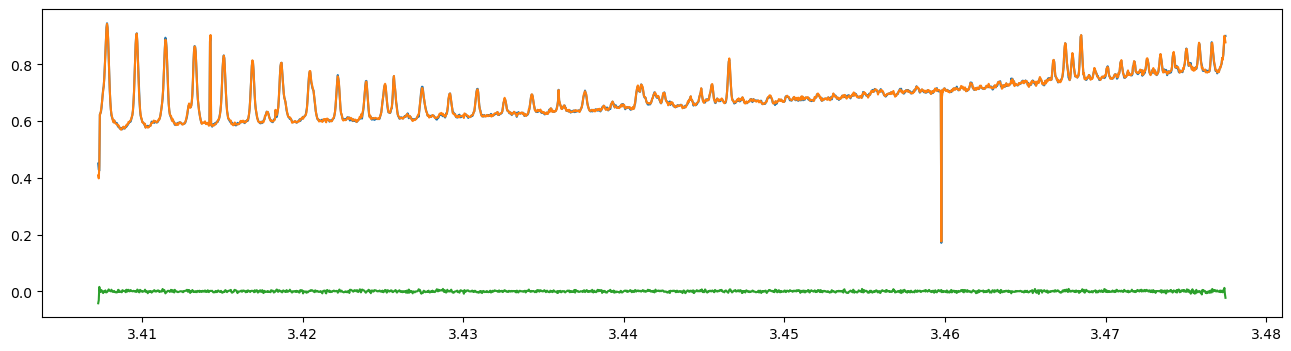

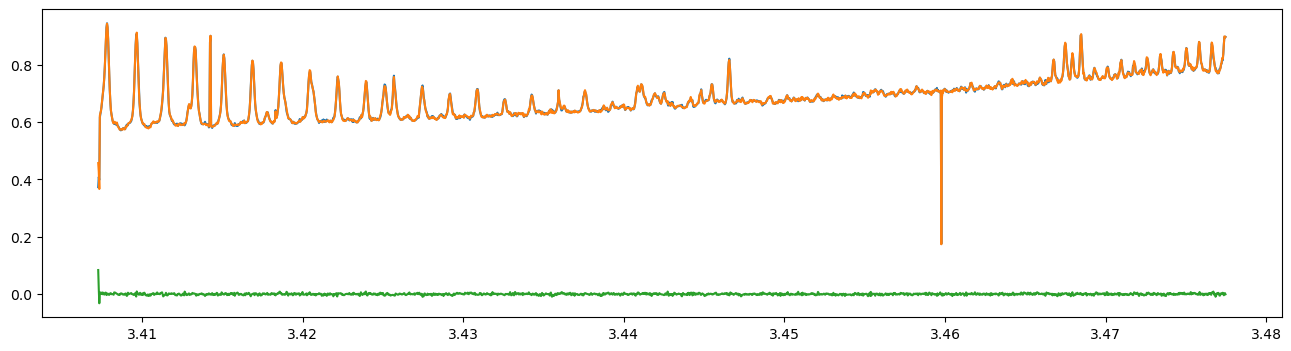

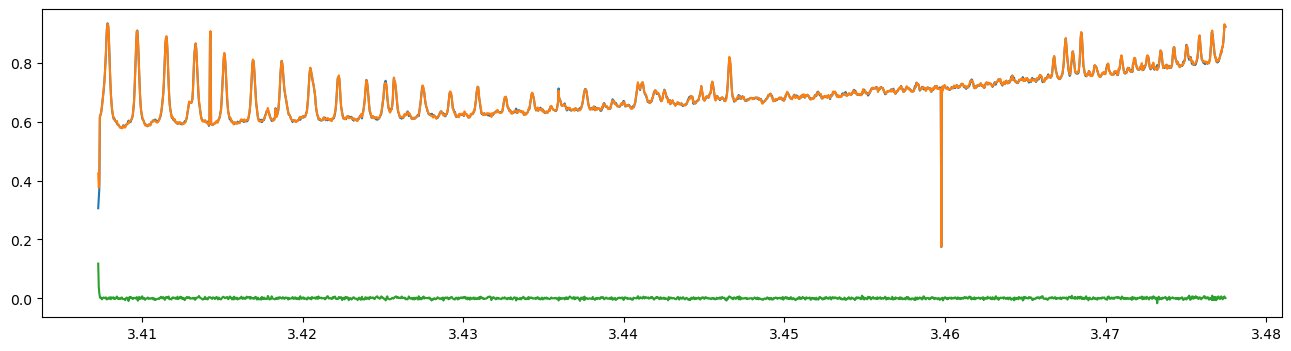

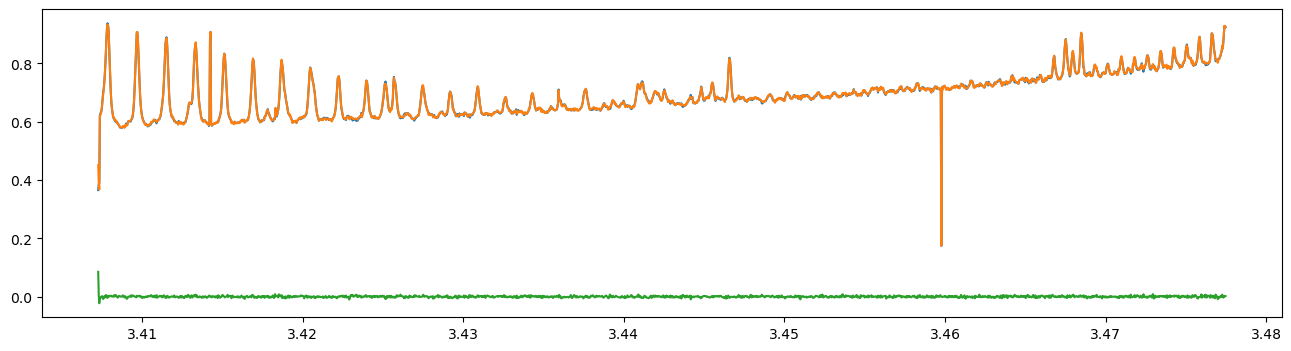

In [15]:
plt.figure(figsize=(16, 4))
plt.plot(wave_micron4th, (starB1/flat)[posB])
plt.plot(wave_micron4th, (starA1/flat)[posB])
plt.plot(wave_micron4th, (starA1/flat)[posB] - (starB1/flat)[posB])
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(wave_micron4th, (starB2/flat)[posB])
plt.plot(wave_micron4th, (starA2/flat)[posB])
plt.plot(wave_micron4th, (starA2/flat)[posB] - (starB2/flat)[posB])
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(wave_micron4th, (starB3/flat)[posB])
plt.plot(wave_micron4th, (starA3/flat)[posB])
plt.plot(wave_micron4th, (starA3/flat)[posB] - (starB3/flat)[posB])
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(wave_micron4th, (starB4/flat)[posB])
plt.plot(wave_micron4th, (starA4/flat)[posB])
plt.plot(wave_micron4th, (starA4/flat)[posB] - (starB4/flat)[posB])
plt.show()

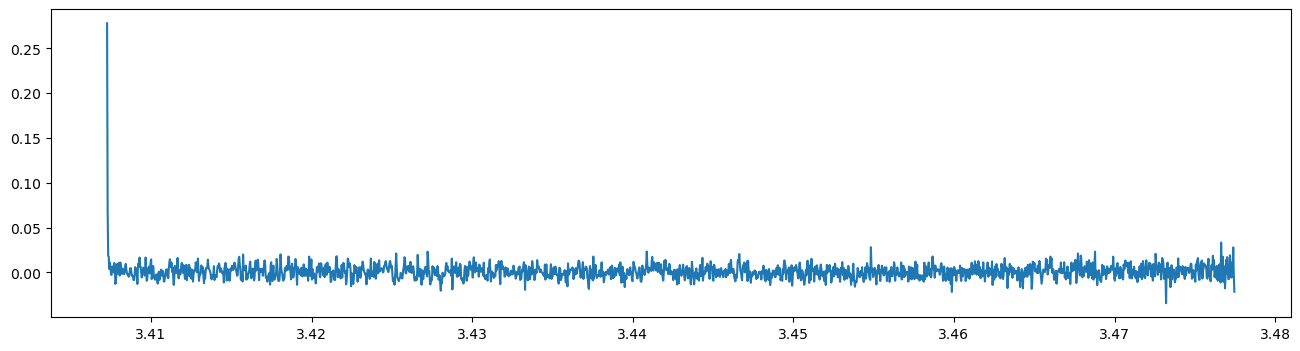

In [14]:
posA = 43
posB = 141

starcomb1 = starA1/flat-starB1/flat
starcomb2 = starA2/flat-starB2/flat
starcomb3 = starA3/flat-starB3/flat
starcomb4 = starA4/flat-starB4/flat

star4A = starcomb1[posA] + starcomb2[posA] + starcomb3[posA] + starcomb3[posA]
star4B = starcomb1[posB] + starcomb2[posB] + starcomb3[posB] + starcomb3[posB]

star4 = star4A + star4B

plt.figure(figsize=(16, 4))
#plt.plot(wave_micron4th, star4A)
plt.plot(wave_micron4th, star4B)
#plt.plot(wave_micron4th, star4)
plt.show()

In [16]:
def ABFlat(A,B,Flat):
    C = (A - B)/Flat
    return C

In [17]:
star = ABFlat(starA1,starB1,flat)

#jup1 = ABFlat(jupiter1,sky1,flat)
#jup2 = ABFlat(jupiter2,sky2,flat)
#jup3 = ABFlat(jupiter3,sky3,flat)
jup4 = ABFlat(jupiter4,sky4,flat)
#jup5 = ABFlat(jupiter5,sky5,flat)

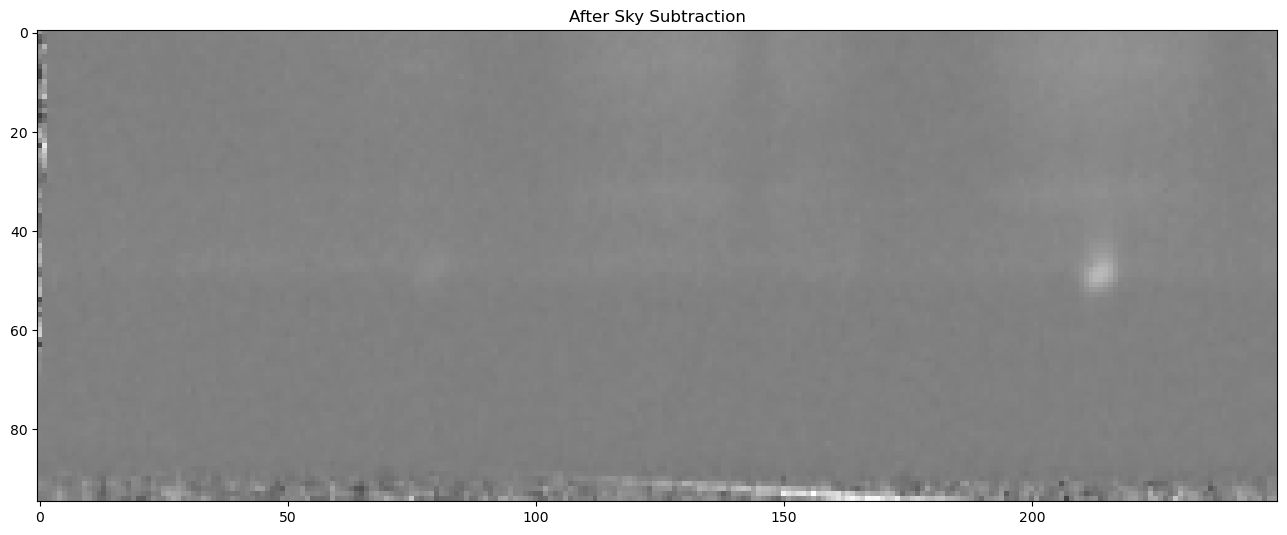

In [18]:
plt.figure(figsize=(16, 12))
plt.imshow(jup4[200:,0:250], cmap='gray', vmin = -0.3, vmax = 0.3)
plt.title("After Sky Subtraction")
plt.show()

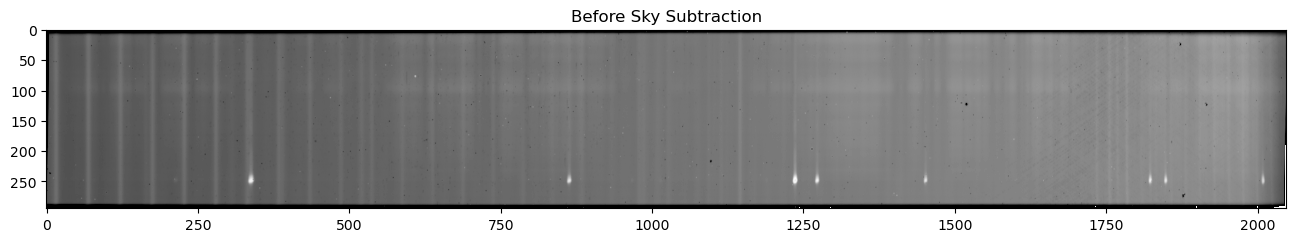

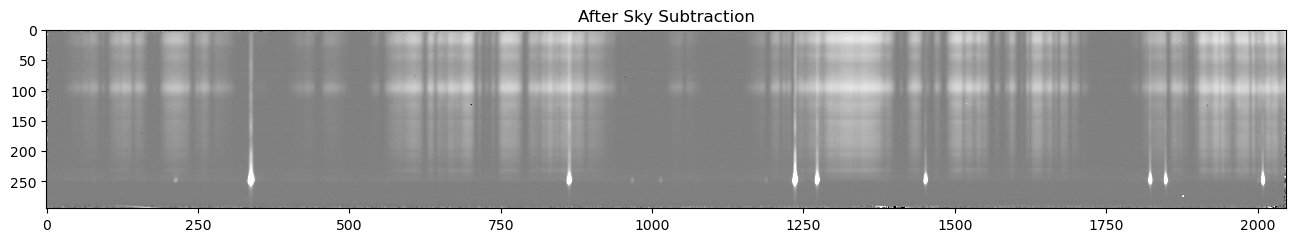

In [19]:
plt.figure(figsize=(16, 12))

#plt.imshow(jupiter4, cmap='gray', vmin = 20)
plt.imshow(jupiter4, cmap='gray', norm = lognorm(vmin = 2000))
#plt.colorbar()
plt.title("Before Sky Subtraction")
plt.show()

plt.figure(figsize=(16, 12))
plt.imshow(jup4, cmap='gray', vmin = -0.3, vmax = 0.3)
plt.title("After Sky Subtraction")
plt.show()

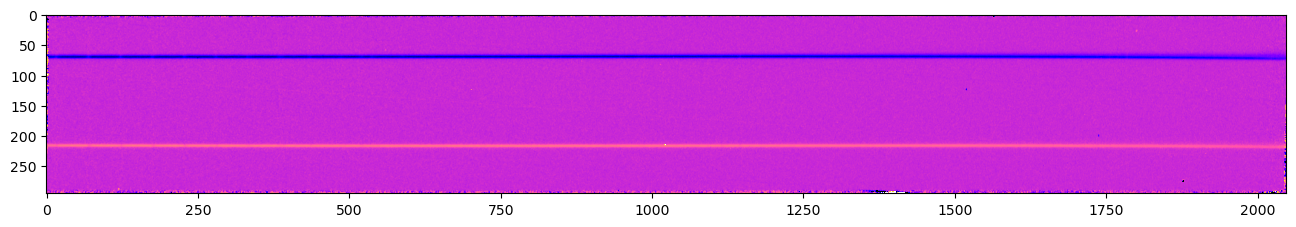

In [20]:
plt.figure(figsize=(16, 12))
plt.imshow(star, cmap='gnuplot2', vmin = -0.2, vmax = 0.2)
#plt.axhline(y = 52, linestyle = ':',color = 'b', linewidth = 3)
#plt.axhline(y = 160, linestyle = ':',color = 'y', linewidth = 3)
plt.show()

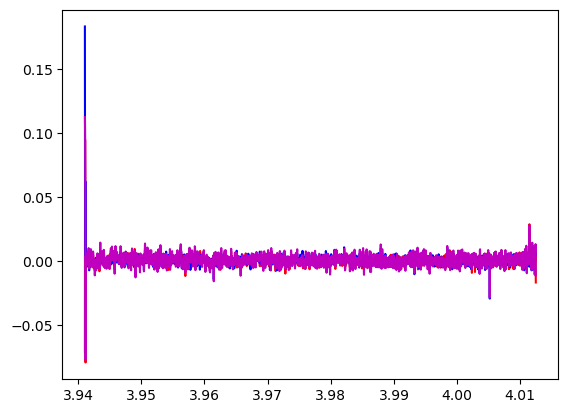

In [21]:
#need to pull only the traces from the star spec:
trace1 = star[52]
trace2 = star[160]

subtractedstar = trace1 + trace2

plt.plot(wave_micron1st, star[52], 'r')
plt.plot(wave_micron1st, star[160], 'b')
plt.plot(wave_micron1st, subtractedstar, 'm')
#plt.ylim(-0.02,0.02)

In [22]:
#np.save("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o4/star_e1o4", subtractedstar)
#np.save("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o1/jup1_e1o1", jup1)
#np.save("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o1/jup2_e1o1", jup2)
#np.save("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o1/jup3_e1o1", jup3)
#np.save("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o1/jup4_e1o1", jup4)
#np.save("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o1/jup5_e1o1", jup5)

In [23]:
#multiplying calibrator flux by normalization constant listed at top of file
#star_e1o1_file = pd.read_csv(r"C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o1/star e1o1.dat", delim_whitespace=True,skipfooter=2049,engine='python')
#star1norm = star_e1o1_file["Normalization"][0]
#star_1st = star_e1o1['flux']*star1norm

#star_e1o4_file = pd.read_csv(r"C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o4/star e1o4.dat", delim_whitespace=True, skipfooter=2049,engine='python')
#star4norm = star_e1o4_file["Normalization"][0]
#star_4th = star_e1o4['flux']*star1norm

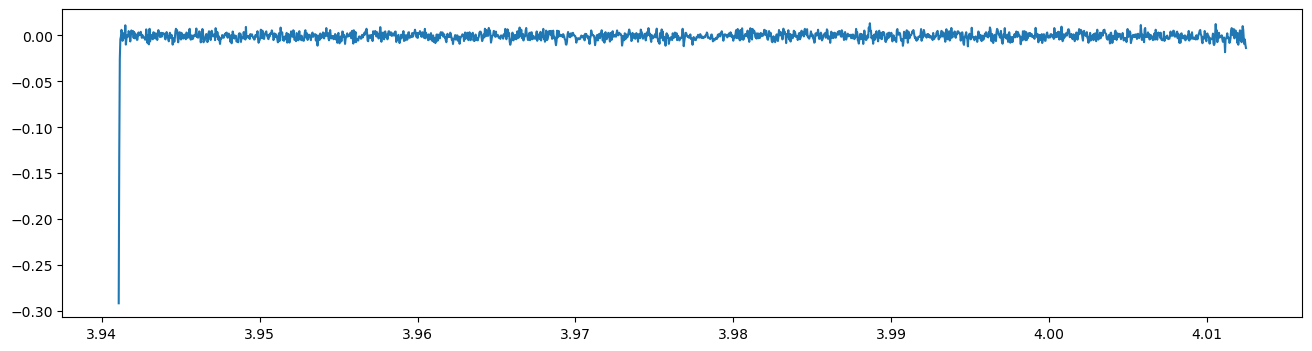

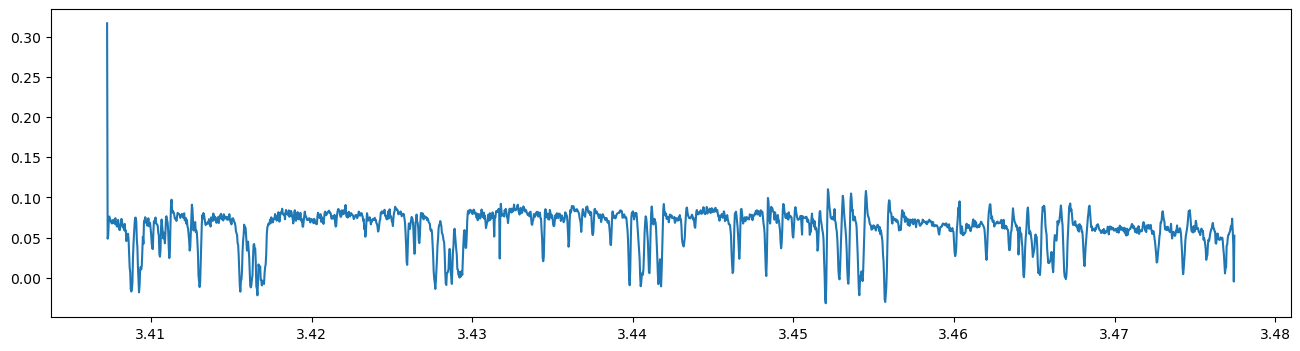

In [24]:
#1st order plotting
plt.figure(figsize=(16, 4))
plt.plot(wave_micron1st, star_e1o1)
plt.show()

#4th order plotting
plt.figure(figsize=(16, 4))
plt.plot(wave_micron4th, star_e1o4)
plt.show()

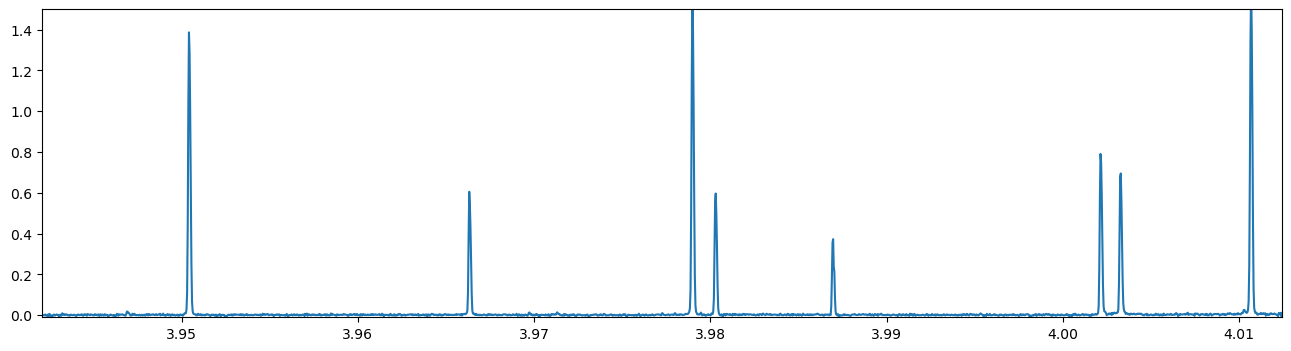

NameError: name 'wave1' is not defined

<Figure size 1600x400 with 0 Axes>

In [25]:
#1st order plotting
plt.figure(figsize=(16, 4))
plt.plot(wave_micron1st, jup4_e1o1[253])
plt.ylim(-.01, 1.5)
plt.xlim(wave_micron1st[0]+0.001,wave_micron1st[2046])
#plt.xlim(3.412,3.414)
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(wave1, model1, color = "y", linewidth=1.5, label='Model', linestyle=":")
#plt.legend()
plt.show()


plt.figure(figsize=(16, 12))
plt.imshow(jup4_e1o1[213:293], cmap='terrain')
plt.axhline(y = 40, color = 'black', label = "Position of #253")
plt.legend(bbox_to_anchor=(1.0, 0.05))
plt.show()

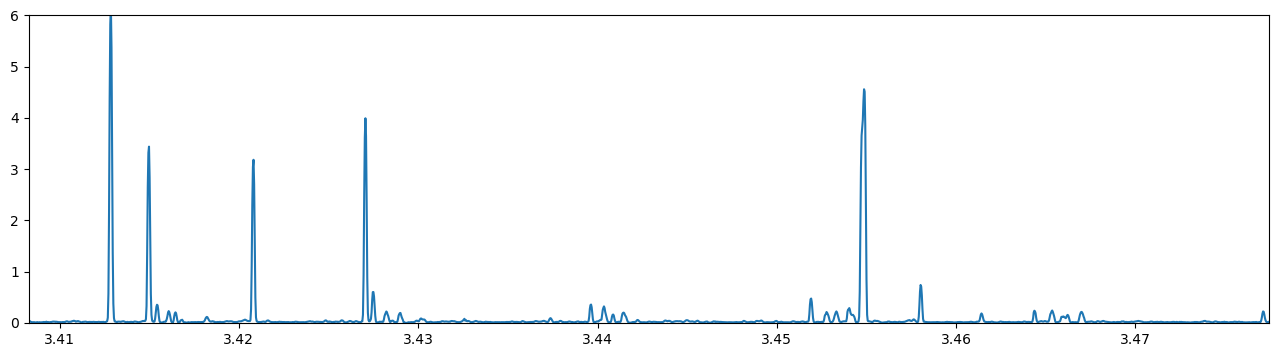

NameError: name 'wave4' is not defined

<Figure size 1600x400 with 0 Axes>

In [26]:
#4th order plotting
plt.figure(figsize=(16, 4))
plt.plot(wave_micron4th, jup4_e1o4[185])
plt.ylim(-.01, 6)
plt.xlim(wave_micron4th[0]+0.001,wave_micron4th[2046])
#plt.xlim(3.412,3.414)
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(wave4, model4, color = "y", linewidth=1.5, label='Model', linestyle=":")
#plt.legend()
plt.show()


plt.figure(figsize=(16, 12))
plt.imshow(jup4_e1o4[170:200], cmap='gnuplot_r')
plt.axhline(y = 15, color = 'black', label = "Position of #253")
plt.legend(bbox_to_anchor=(1.0, 0.05))
plt.show()

In [27]:
#flux calibration begins here
#start by building constant to multiply all files by

In [29]:
#load in star spectrum
# A0V kp00_9500[g40] 
#need T_eff = 9520, metallicity = 0, log(g) = 4.14
sp = S.Icat('k93models', 9520, 0, 4.14)

#configure star spectrum into something the bandpass can normalize
Kurucz = S.ArraySpectrum(sp.wave, sp.flux)

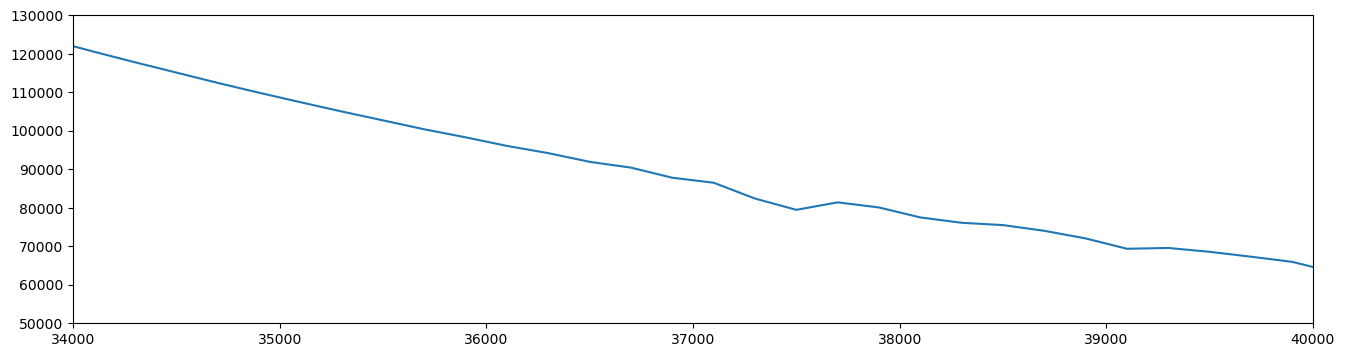

In [30]:
plt.figure(figsize=(16, 4))
plt.plot(Kurucz.wave, Kurucz.flux)
plt.xlim(34000, 40000)
plt.ylim(5e4, 1.3e5)
plt.show()

In [31]:
#from this point there are separate variables for 1st and 4th order

In [32]:
#magnitude of observed star within the specific wavelength range being used
#had to use K-band since SIMBAD doesn't go any further into IR, but pretty close to KL?

#4th order
#flam = 1.026e-13 W/m^2/micron * 10^-1 for the conversion of um, m^2, and W, to AA, cm^2, erg/s

#1st order
#flam = 5.844e-14 W/m^2/micron * 10^-1 for the conversion of um, m^2, and W, to AA, cm^2, erg/s
#pulled from Gemini conversion site + simbad data on HD219833
constant_4th = 1.026*10**(-13)*10**(-1)
constant_1st = 5.844*10**(-14)*10**(-1)

In [33]:
#find index of center of band for normalization at center of order band
#(1st: 3.98 -> 39800 Angstroms (closest 39700); 4th:3.43 micron -> 34300 Angstroms)
number1st = np.abs(Kurucz.wave - 39800).argmin()
number4th = np.abs(Kurucz.wave - 34300).argmin()


print(number1st)
print(number4th)
print(Kurucz.wave[number1st])
print(Kurucz.wave[number4th])

1000
973
39700.0
34300.0


Correct Normalization


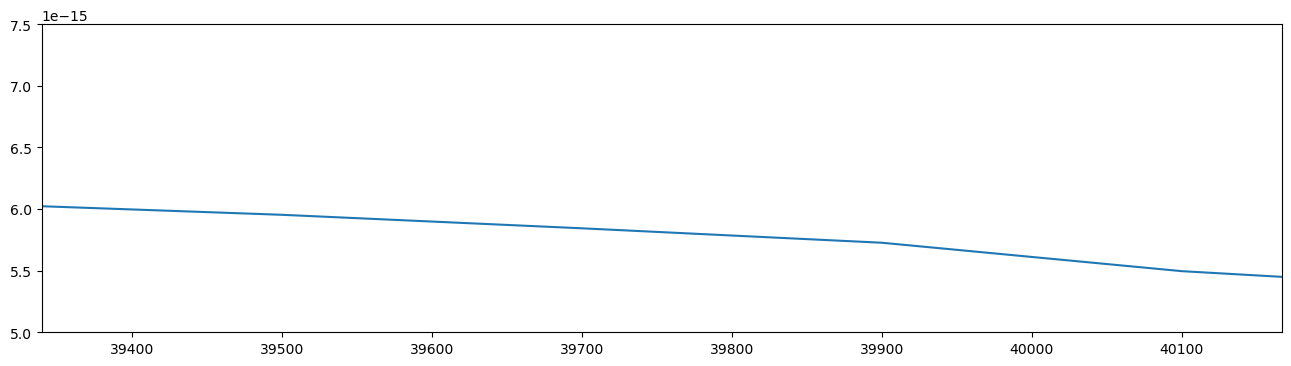

Correct Normalization


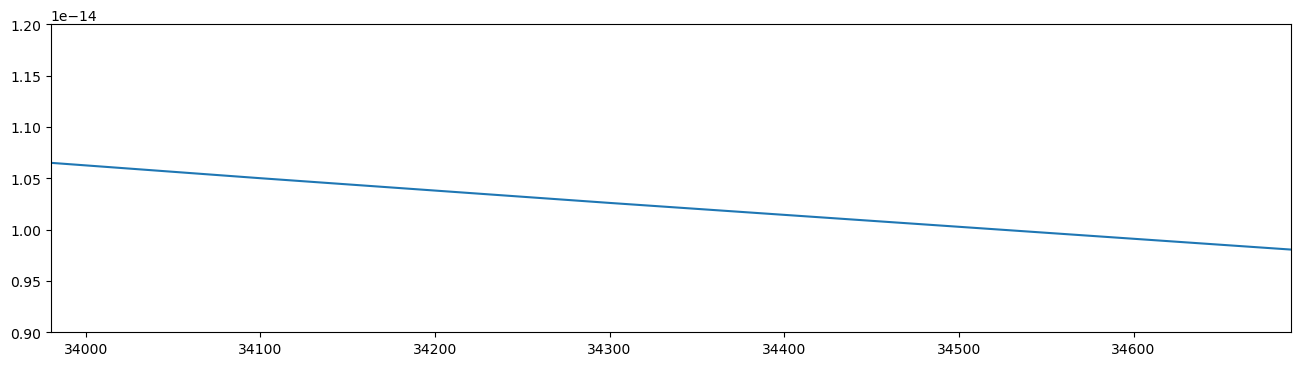

In [34]:
#normalize the model spectrum to the magnitude of the star
starnorm1st = constant_1st/Kurucz.flux[number1st]
Kurucz_band1st = starnorm1st*Kurucz.flux

starnorm4th = constant_4th/Kurucz.flux[number4th]
Kurucz_band4th = starnorm4th*Kurucz.flux


#some checks to make sure things are working correctly:
#print(starnorm1st)
#print(np.abs(Kurucz_band1st - constant_1st).argmin())
if np.abs(Kurucz_band1st - constant_1st).argmin() == number1st:
    print("Correct Normalization")
else:
    print("Incorrect Normalization")


plt.figure(figsize=(16, 4))
plt.plot(Kurucz.wave, Kurucz_band1st)
plt.xlim(39340, 40166.7)
plt.ylim(0.5e-14,0.75e-14)
plt.show()



#print(starnorm4th)
#print(np.abs(Kurucz_band4th - constant_4th).argmin())
if np.abs(Kurucz_band4th - constant_4th).argmin() == number4th:
    print("Correct Normalization")
else:
    print("Incorrect Normalization")


plt.figure(figsize=(16, 4))
plt.plot(Kurucz.wave, Kurucz_band4th)
plt.xlim(33980, 34690)
plt.ylim(0.9e-14,1.2e-14)
plt.show()

In [35]:
#in units of erg/s/cm^2/AA, should be W/m^2/nm
Kurucz_W1st = (Kurucz_band1st)*10**(-2)
Kurucz_W4th = (Kurucz_band4th)*10**(-2)

In [36]:
#interpolate Kurucz spectrum to calibrator wavelengths so they are the same size & at same wavelengths
interpol1st = np.interp(wave_ang1st, Kurucz.wave, Kurucz_W1st)
interpol4th = np.interp(wave_ang4th, Kurucz.wave, Kurucz_W4th)

if len(interpol1st) == len(wave_ang1st):
    print("Correct Interpolation")
else:
    print("Incorrect Normalization")
    
if len(interpol4th) == len(wave_ang4th):
    print("Correct Interpolation")
else:
    print("Incorrect Normalization")

Correct Interpolation
Correct Interpolation


In [37]:
#to use with h3ppy, also need to include information about the telescope:
#need units in W/m^2/micron/str, so first: nm to micron, multiply by 0.001

# Need to convert the instrument FOV to units of sterradian
# The pixel width is 0.144 arcsec with a slit width of 0.288 arcsec (NIRSPEC High resolution echelle)
# Note - there are 4.2545e10 arceconds in a sterradian
final_constant1st = interpol1st * 0.01 * 4.2545e10 / (0.144 * 0.288)
final_constant4th = interpol4th * 0.01 * 4.2545e10 / (0.144 * 0.288)

print(final_constant1st)
print(final_constant4th)

[6.14739992e-07 6.14724481e-07 6.14708836e-07 ... 5.62135520e-07
 5.62110732e-07 5.62086015e-07]
[1.08073681e-06 1.08069274e-06 1.08064880e-06 ... 9.96313399e-07
 9.96274258e-07 9.96235003e-07]


In [38]:
#print(np.min(star_1st))
#print(np.max(star_1st))

print(np.min(jup1_e1o1))
print(np.max(jup1_e1o1))

-19.936094
17.206072


In [39]:
fluxcal1 = final_constant1st/star_e1o1
fluxcal4 = final_constant4th/star_e1o4

print(fluxcal1)
print(fluxcal4)

[-2.10834982e-06 -4.79384329e-06 -2.41976700e-05 ... -1.28009665e-04
 -5.40531408e-05 -4.10223061e-05]
[ 3.41514799e-06  2.22373866e-05  2.06316843e-05 ...  2.37782604e-05
 -2.11577583e-04  1.90484166e-05]


In [40]:
binnedfluxcal1=np.mean(np.array(fluxcal1).reshape([512,4]), axis=1)
binnedfluxcal4=np.mean(np.array(fluxcal4).reshape([512,4]), axis=1)

binnedwave1 = np.mean(np.array(wave_micron1st).reshape([512,4]), axis=1)
binnedwave4 = np.mean(np.array(wave_micron4th).reshape([512,4]), axis=1)

fluxinterpol1 = np.interp(wave_micron1st, binnedwave1, binnedfluxcal1)
fluxinterpol4 = np.interp(wave_micron4th, binnedwave4, binnedfluxcal4)

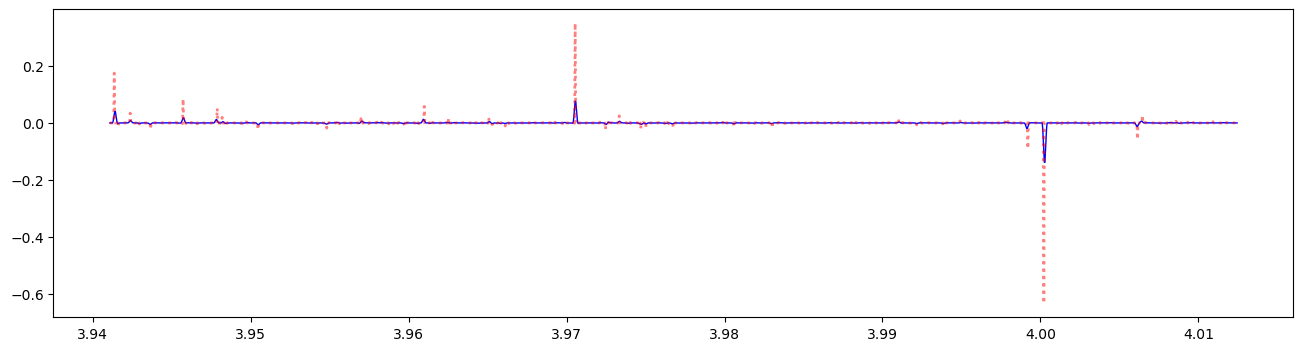

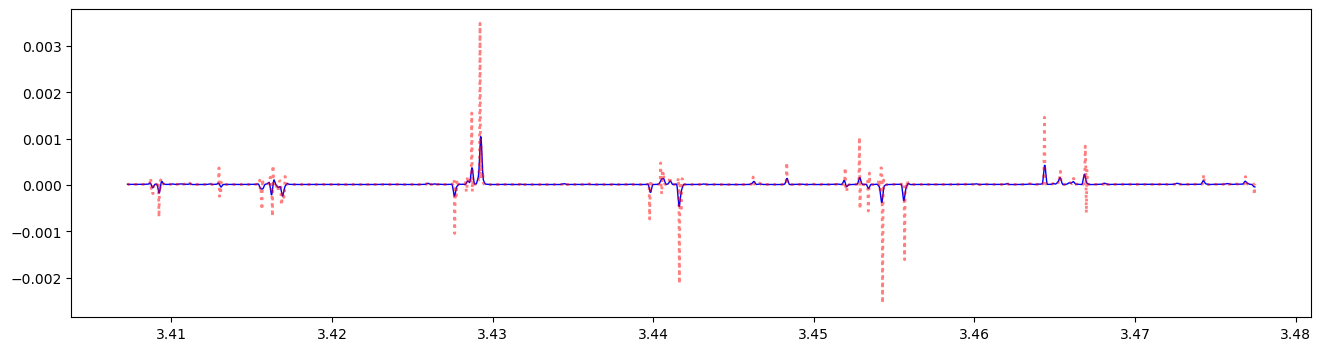

In [41]:
plt.figure(figsize=(16, 4))
#plt.plot(wave_micron1st, final_constant1st, 'y')
#plt.plot(wave_micron1st, star_e1o1, 'b')
plt.plot(wave_micron1st, fluxinterpol1, 'b', alpha = 1, linewidth = 1)
plt.plot(wave_micron1st, fluxcal1, 'r', alpha = 0.5, linewidth = 2, linestyle = ":")
#plt.xlim(39340, 40166.7)
#plt.ylim(-0.025,0.03)
plt.show()

plt.figure(figsize=(16, 4))
#plt.plot(wave_micron4th, final_constant4th, 'y')
#plt.plot(wave_micron4th, star_e1o4, 'b')
plt.plot(wave_micron4th, fluxinterpol4, 'b', alpha = 1, linewidth = 1)
plt.plot(wave_micron4th, fluxcal4, 'r', alpha = 0.5, linewidth = 2, linestyle = ":")
#plt.xlim(39340, 40166.7)
#plt.ylim(-0.025,0.2)
plt.show()

In [42]:
#now all's that left to do is divide the targets by the calibrator star
#and multiply by the calibrator "constant"
def fluxcal(target, calibrator, constant):
    finalflux = []
    for i in range(len(target)):
        singleflux = (target[i]/calibrator)*constant
        finalflux.append(singleflux)
    return np.array(finalflux)

In [43]:
jup1_e1o1_final = fluxcal(jup1_e1o1,star_e1o1,final_constant1st)
jup2_e1o1_final = fluxcal(jup2_e1o1,star_e1o1,final_constant1st)
jup3_e1o1_final = fluxcal(jup3_e1o1,star_e1o1,final_constant1st)
jup4_e1o1_final = fluxcal(jup4_e1o1,star_e1o1,final_constant1st)
jup5_e1o1_final = fluxcal(jup5_e1o1,star_e1o1,final_constant1st)

jup1_e1o4_final = fluxcal(jup1_e1o4,star_e1o4,final_constant4th)
jup2_e1o4_final = fluxcal(jup2_e1o4,star_e1o4,final_constant4th)
jup3_e1o4_final = fluxcal(jup3_e1o4,star_e1o4,final_constant4th)
jup4_e1o4_final = fluxcal(jup4_e1o4,star_e1o4,final_constant4th)
jup5_e1o4_final = fluxcal(jup5_e1o4,star_e1o4,final_constant4th)

In [44]:
jup1_e1o1_final = jup1_e1o1*fluxinterpol1

jup1_e1o4_final = jup1_e1o4*fluxinterpol4

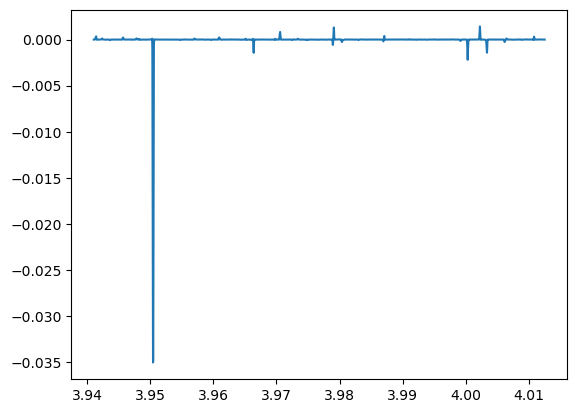

In [45]:
plt.plot(wave_micron1st, jup1_e1o1_final[253])

In [46]:
np.save("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o1/final/jup1_e1o1_final", jup1_e1o1_final)
np.save("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o1/final/jup2_e1o1_final", jup2_e1o1_final)
np.save("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o1/final/jup3_e1o1_final", jup3_e1o1_final)
np.save("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o1/final/jup4_e1o1_final", jup4_e1o1_final)
np.save("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o1/final/jup5_e1o1_final", jup5_e1o1_final)

np.save("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o4/final/jup1_e1o4_final", jup1_e1o4_final)
np.save("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o4/final/jup2_e1o4_final", jup2_e1o4_final)
np.save("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o4/final/jup3_e1o4_final", jup3_e1o4_final)
np.save("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o4/final/jup4_e1o4_final", jup4_e1o4_final)
np.save("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o4/final/jup5_e1o4_final", jup5_e1o4_final)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o1/final/jup1_e1o1_final.npy'

In [ ]:
#np.savetxt("C:/idlfiles/redspec3.0/Reduction Files/data/reduced_2022/spec/e1o1/final/jup1_e1o1_final", jup1_e1o1_final, delimiter=",")

In [47]:
# Create the H3+ object
h3p1 = h3ppy.h3p()

# Define a wavelength range, e.g. typical of an observation of the H3+ Q branch
# Specify the start and end wavelengths, and the number of wavelength elements
wave1 = h3p1.wavegen(wave_micron1st[0], wave_micron1st[2047], 10000)
#wave = h3p.wavegen(3.934, 4.01667, 10000)

# Create a H3+ model spectrum for a set of physical parameters 
# Spectral resolution R = 1200, T = 1000, N = 1e14
# This is the minimum set of parameters required for generating a model
model1 = h3p1.model(density = 1e+14, temperature = 1000, R = 75000, wavelength = wave1)


h3p4 = h3ppy.h3p()

wave4 = h3p4.wavegen(wave_micron4th[0], wave_micron4th[2047], 10000)

model4 = h3p4.model(density = 1e+14, temperature = 1000, R = 75000, wavelength = wave4)

FileNotFoundError: C:\Users\kater00\anaconda3\lib\site-packages\h3ppy\data/h3p_line_list_neale_1996_subset.txt not found.

In [ ]:
#1st order:3.953,3.98553,3.98702,4.0119,4.013245

fig, ax = plt.subplots(figsize=[16, 8])


plt.plot(wave_micron1st,jup1_e1o1_final[253], label='Data')
plt.ylim(-1e-4,5e-4)

#notes for myself to find good lines - testing w/ slit pos 250
#Q1 line - definitely use
#plt.xlim(3.9525,3.9535)
#plt.axvline(x = 3.95299, color = "salmon") #center of h3ppy line
#plt.axvline(x = 3.953004, color = "green") #center of data line


#plt.xlim(3.984, 3.986)
#plt.axvline(x = 3.985525, color = "salmon") #center of h3ppy line
#plt.axvline(x = 3.985425, color = "green") #center of data line

#plt.xlim(3.9868, 3.9872)
#plt.axvline(x = 3.98702, color = "salmon") #center of h3ppy line
#plt.axvline(x = 3.9869753, color = "green") #center of data line

#plt.xlim(3.994, 3.996)
#plt.axvline(x=3.99463, color='salmon') #center of h3ppy line
#plt.axvline(x=3.994678, color='green') #cetner of data line?



#plt.xlim(3.969, 3.973)
#plt.axvline(x=3.971062, color='pink') #nothing




#plt.xlim(4.01, 4.018)
#plt.axvline(x=4.01197, color='lightblue')
#plt.axvline(x=4.01324, color = 'lightblue')

    
plt.plot(wave1, model1, color = "y", linewidth=1.5, label='Model', linestyle=":")
plt.legend()
plt.show()

plt.figure(figsize=(16, 12))
plt.imshow(jup1_e1o1_final, cmap='gray', vmin = -1e-4, vmax = 1e-4)
#plt.legend(bbox_to_anchor=(1.0, 0.05))
plt.show()

In [ ]:
np.max(jup1_e1o1_final)

In [ ]:
#4th order: 3.41277,3.41488,3.42071,3.42697,3.45475

fig, ax = plt.subplots(figsize=[16, 8])


plt.plot(wave_micron4th,jup1_e1o4_final[150], label='Data')
plt.ylim(-1e-6,1e-5)
         
#notes for myself to find good lines - testing w/ slit pos 190

#plt.xlim(3.4125,3.41325)                     #looks really good
plt.axvline(x = 3.412771, color = "salmon") #center of h3ppy line
plt.axvline(x = 3.41285, color = "green") #center of data line

#plt.xlim(3.4145,3.4155)                 #possibly contaminated?
#plt.axvline(x = 3.41488, color = "salmon") #center of h3ppy line
#plt.axvline(x = 3.414955, color = "green") #center of data line

#plt.xlim(3.42,3.4215)                     #looks really good
plt.axvline(x = 3.42071, color = "salmon") #center of h3ppy line
plt.axvline(x = 3.4208, color = "green") #center of data line

#plt.xlim(3.4268,3.4273)                     #looks really good
plt.axvline(x = 3.42697, color = "salmon") #center of h3ppy line
plt.axvline(x = 3.427058, color = "green") #center of data line



#plt.xlim(3.41,3.415)
#plt.axvline(x=3.412775, color='lightblue', label='3.4206') #not bad
#plt.xlim(3.42,3.421)
#plt.axvline(x=3.42071, color='pink', label='3.4206') #questionable - contaminated? shift left or right
#plt.xlim(3.4545,3.455)
#plt.axvline(x=3.454685, color='lightgreen', label='3.4547') #doublet, contaminated?
#plt.axvline(x=3.454825, color='lightgreen', label='3.4547')

    
plt.plot(wave4, model4, color = "y", linewidth=1.5, label='Model', linestyle=":")
plt.legend()
plt.show()


plt.figure(figsize=(16, 12))
plt.imshow(jup1_e1o4_final, cmap='flag', vmin = -1e-5, vmax = 1e-5)
#plt.legend(bbox_to_anchor=(1.0, 0.05))
plt.show()

In [ ]:
len(jup3_e1o1_final)

In [ ]:
width = [5,5]


def subdividezeroes(waves, spec, middles, width = width) : 
    ret = []
    count = 0
    for m in middles :
            centre = np.abs(waves - m).argmin()
            for i in range(10):
                ret.append(0)
            for i in range(centre - width[count], centre + width[count]) : 
                    ret.append(spec[i])
            for i in range(10):
                ret.append(0)
            count = count + 1
    return np.array(ret)

def subdividewavezeroes(waves, spec, middles, width = width) : 
    count = 0
    ret = []
    for m in middles : 
            centre = np.abs(waves - m).argmin()
            for i in range(centre - width[count]-10, centre + width[count] + 10) : 
                    ret.append(spec[i])
            count = count + 1
    return np.array(ret)

In [ ]:
def subdivide(waves, spec, middles, width = 10) : 
    ret = []
    for m in middles :
            centre = np.abs(waves - m).argmin()
            for i in range(centre - width, centre + width) : 
                    ret.append(spec[i])
    return np.array(ret)

In [ ]:
def subdivide_multiorder(wave1, wave2, spec1, spec2, middles, width = 3): 
    
    spec = []
    wave = []
    for i in range(len(spec1)):
        spec.append(spec1[i])
    for i in range(len(spec2)):
        spec.append(spec2[i])
    for i in range(len(wave1)):
        wave.append(wave1[i])
    for i in range(len(wave2)):
        wave.append(wave2[i])
        
    spec = np.array(spec)
    wave = np.array(wave)
    
    count = 0
    ret = []
    for m in middles:
        centre = np.abs(wave - m).argmin()
        for i in range(centre - width, centre + width) : 
            ret.append(spec[i])
        count = count + 1
    return np.array(ret)

def subdivide_multiorder_wave(wave1, wave2, spec1, spec2, middles, diff, width = 3): 
    
    spec = []
    wave = []
    for i in range(len(spec1)):
        spec.append(spec1[i])
    for i in range(len(spec2)):
        spec.append(spec2[i])
    for i in range(len(wave1)):
        wave.append(wave1[i])
    for i in range(len(wave2)):
        wave.append(wave2[i])
        
    spec = np.array(spec)
    wave = np.array(wave)
    
    count = 0
    ret = []
    for m in middles:
        centre = np.abs(wave - m - diff[count]).argmin()
        for i in range(centre - width, centre + width) : 
            ret.append(spec[i])
        count = count + 1
    return np.array(ret)

In [ ]:
centers = [3.4127945,3.420747,3.953004]

#all possible lines
#centers = [3.412771,3.42071,3.95299]

#order 1: 3.95299 ( Q1 line )
#order 4: 3.412771 (?), 3.42071


#data numbers
#order1: 3.952958
#order4:3.420747

diff1 = 3.412771-3.4127945
diff2 = 3.42071-3.420747
diff3 = 3.95299-3.953004


differences = [diff1,diff2,diff3]

# Create sub-arrays, focusing on where the H3+ lines are
#subspecoff = subdivideoffset(wave, spec, centers)
subspec = subdivide_multiorder(wave_micron1st, wave_micron4th, jup1_e1o1_final[252], jup1_e1o4_final[190], centers)
subwave = subdivide_multiorder_wave(wave_micron1st, wave_micron4th, wave_micron1st, wave_micron4th, centers, differences)

In [ ]:
print(subspec.shape)
print(subwave.shape)

In [ ]:
h3p = h3ppy.h3p()

# Set the wavelength and the data
h3p.set(wavelength = subwave, data = subspec, R = 20000)

# We need to guess a temperature
h3p.set(temperature = 700)

# We need to guess a density?
#h3p.set(density = 4.0E14)

# Let h3ppy try and guess a wavelength offset
guess = h3p.guess_offset()
# Guess the density and proceed with a five parameter fit
h3p.guess_density()
# Let h3ppy do the fitting - this will do a full five parameter fit
fit = h3p.fit(verbose = True)

In [ ]:
vars, errs = h3p.get_results()

In [ ]:
data = 1

if data == 1:
    # Create a x scale for plotting 
    xx      = list(range(len(subspec)))
    xaxis = []
    for i in range(len(xx)):
        xaxis.append(xx[i])
    subspectest = []
    for i in range(len(subspec)):
        subspectest.append(subspec[i])
        
if data == 0:
    # Create a x scale for plotting 
    xx      = list(range(len(subspecoff)))
    xaxis = []
    for i in range(len(xx)):
        xaxis.append(xx[i])
    subspectest = []
    for i in range(len(subspecoff)):
        subspectest.append(subspecoff[i])

In [ ]:
cpos = np.arange(3) * 2 + 6


fig, ax = plt.subplots(figsize=[10, 8])

ax.plot(xaxis, subspectest, 'pink')
ax.plot(xaxis, subspectest, '.', label='Observation')
#ax.plot(xx, fit, label = 'h3ppy H$_3^+$ fit')

    
ax.set_title('Remarkably Bad h3ppy Fit')
ax.set(xlabel = h3p.xlabel(), ylabel = h3p.ylabel(prefix = 'm'), xticks = cpos)
ax.set_xticklabels(centers)
ax.legend(frameon = True)
plt.ylim(-5e-3,8e-4)
#plt.tight_layout()
#plt.savefig('../img/nirspec_jupiter_fit.png')
#plt.close()

In [ ]:
fig, ax = plt.subplots(figsize=[16, 4])


for i in range(50):
    plt.plot(wave_micron1st,jup5_e1o1_final[i])
    #plt.ylim(-1e-7,1e-5)
    
ax.plot(wave1, model1, color = "black", linewidth=1.5, label='Model')
plt.show()


fig, ax = plt.subplots(figsize=[16, 4])


for i in range(len(jup5_e1o4_final)):
    plt.plot(wave_micron4th,jup5_e1o4_final[i])
    #plt.ylim(-0.5e0,5)
    
ax.plot(wave4, model4, color = "black", linewidth=1.5, label='Model')
plt.show()

In [ ]:
#looking into binning options?

binnedjup1_e1o1=np.mean(jup1_e1o1_final[190].reshape([512,4]), axis=1)
binnedwave_e1o1=np.mean(wave_micron1st.array.reshape([512,4]), axis=1)

In [ ]:
fig, ax = plt.subplots(figsize=[16, 8])


plt.plot(binnedwave_e1o1,binnedjup1_e1o1, label='Data')
plt.plot(wave_micron1st,jup1_e1o1_final[190], label='Data', linewidth=0.5, linestyle=":")
plt.plot(wave1, model1, color = "y", linewidth=1.5, label='Model', linestyle=":")

plt.ylim(-1e-6,5e-5)


#notes for myself to find good lines - testing w/ slit pos 250
#Q1 line - definitely use
#plt.xlim(3.9525,3.9535)
plt.axvline(x = 3.95299, color = "salmon") #center of h3ppy line
#plt.axvline(x = 3.952958, color = "green") #center of data line


#plt.xlim(3.984, 3.986)
plt.axvline(x = 3.985525, color = "salmon") #center of h3ppy line
#plt.axvline(x = 3.985425, color = "green") #center of data line

#plt.xlim(3.9868, 3.9872)
plt.axvline(x = 3.98702, color = "salmon") #center of h3ppy line
#plt.axvline(x = 3.9869753, color = "green") #center of data line

#plt.xlim(3.994, 3.996)
#plt.axvline(x=3.99463, color='salmon') #center of h3ppy line
#plt.axvline(x=3.994685, color='green') #cetner of data line?


plt.show()